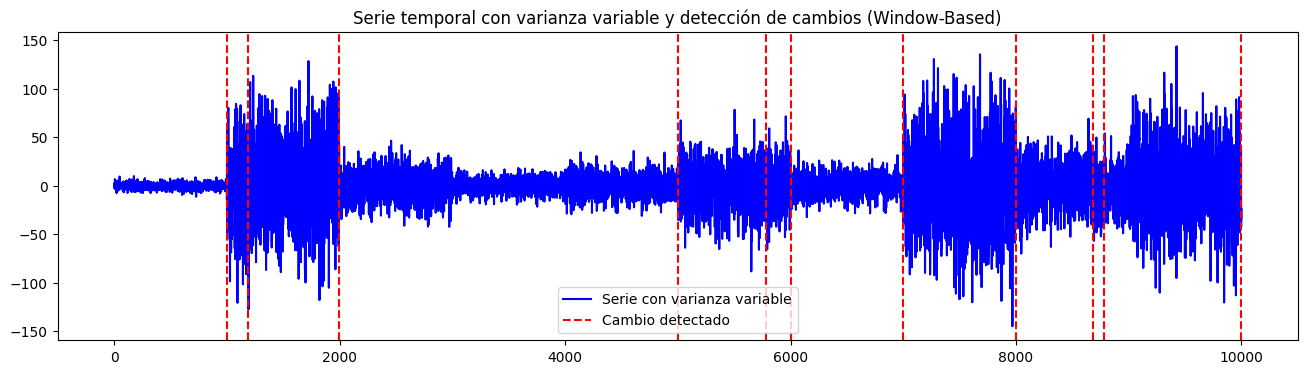

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Función para generar una serie con VARIANZA VARIABLE
def serieVarianzaVariable(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(0, np.random.randint(1, 50), tamano_segmento)  
        for _ in range(num_segmentos) 
    ])
    return pd.Series(serie)

# Generar la serie
serie2 = serieVarianzaVariable(10, 1000)

# Convertir la serie en un array numpy
serie2_np = serie2.values.reshape(-1, 1)

# Aplicar Window-Based con el modelo "rbf"
algo = rpt.Window(width=100, model="rbf").fit(serie2_np)

# Detectar 10 puntos de cambio
cambios_varianza = algo.predict(n_bkps=10)

# Graficar la serie y los cambios detectados
plt.figure(figsize=(16, 4))
plt.plot(serie2, label="Serie con varianza variable", color='blue')

# Dibujar líneas verticales en los puntos de cambio detectados
for cambio in cambios_varianza:
    plt.axvline(x=cambio, color='red', linestyle='--', label="Cambio detectado" if cambio == cambios_varianza[0] else None)

plt.title("Serie temporal con varianza variable y detección de cambios (Window-Based)")
plt.legend()
plt.show()


### 📊 Observaciones sobre Window

El algoritmo **Window** detecta la mayoría de los puntos de cambio, como se muestra anteriormente. Aunque en verdad ha fallado en algunos puntos de cambio y no los coloco donde correspondia, **Window** no los encuentra porque los datos antes y después de esos puntos son tan similares que el algoritmo no puede identificar la diferencia.